<div id="container" style="position:relative;">
<div style="float:left"><h1> Capstone Project: Diabetes risk predictor based on health indicators</h1></div>
<div style="float:left"><h2> Notebook 4: # Modelling - Created by Diego Villanueva</h2></div>
</div>
</div>

## Table of contents

4b. Modelling (Decision Tree)

        4b.1 Load data files

        4b.2 Modelling

        4b.3 Model evaluation

        4b.4 Observations

### Imports

In [16]:
# data manipulation
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# modelling
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# Scaling data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# PCA
from sklearn.decomposition import PCA

# File saving
import joblib 

# Temporary directories for caching
from tempfile import mkdtemp

# Cross-validation
from sklearn.model_selection import cross_val_score

# Pipeline building
from sklearn.pipeline import Pipeline

# Grid search
from sklearn.model_selection import GridSearchCV

### 4b.1 Load data files

In [2]:
X_rem_scaled = joblib.load("../data/Preprocessed_data/X_rem_oversampled_scaled.pkl") # oversampled and scaled dataset
y_rem = joblib.load("../data/Preprocessed_data/y_rem_oversampled.pkl") #oversampled dataset
X_test_scaled = joblib.load("../data/Preprocessed_data/X_test_scaled.pkl") # scaled dataset
y_test = joblib.load("../data/Preprocessed_data/y_test.pkl") #unmodified dataset

X_rem = joblib.load("../data/Preprocessed_data/X_rem_oversampled.pkl") # oversampled, not scaled dataset
X_test = joblib.load("../data/Preprocessed_data/X_test.pkl") # not scaled dataset

### 4b.2 Modelling

In [4]:
# Create a directory that will be used to cache the pipeline results
cachedir = mkdtemp()

In [7]:
# Create a pipeline by passing an estimators

estimators = [('normalise', StandardScaler()), # The scaling part of the pipe
              ('reduce_dim', PCA(n_components=20)), # The PCA part of the pipe, using 20 principle components
              ('dt', DecisionTreeClassifier(max_depth=3))] # The model part of the pipe, in this case a decision tree

pipe = Pipeline(estimators, memory=cachedir)
print(pipe)

Pipeline(memory='/var/folders/6c/0s0k1hv53xn7g3bpzkggst1r0000gn/T/tmppassc966',
         steps=[('normalise', StandardScaler()),
                ('reduce_dim', PCA(n_components=20)),
                ('dt', DecisionTreeClassifier(max_depth=3))])


In [8]:
# Define the parameter grid for grid search
param_grid = {
    'dt__max_depth': [2, 5, 10, 20],  # The depth of the decision tree, 4 options
    'dt__min_samples_leaf': [1, 3, 5, 10],  # The minimum number of samples needed by leaf, 4 options
    'dt__criterion': ['gini', 'entropy']  # The criteria to measure, 2 options
}

In [10]:
# Create the grid and fit it
grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5, verbose= 5, n_jobs= -1)
grid_search.fit(X_rem, y_rem)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


/Users/diego/anaconda3/envs/diego_capstone/lib/python3.8/site-packages/sklearn/pipeline.py:377: UserWarning: Persisting input arguments took 0.56s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  X, fitted_transformer = fit_transform_one_cached(


[CV 2/5] END dt__criterion=gini, dt__max_depth=2, dt__min_samples_leaf=1;, score=0.690 total time=  16.0s
[CV 3/5] END dt__criterion=gini, dt__max_depth=2, dt__min_samples_leaf=1;, score=0.686 total time=  16.2s
[CV 4/5] END dt__criterion=gini, dt__max_depth=2, dt__min_samples_leaf=1;, score=0.690 total time=  16.2s
[CV 1/5] END dt__criterion=gini, dt__max_depth=2, dt__min_samples_leaf=1;, score=0.695 total time=  16.2s
[CV 1/5] END dt__criterion=gini, dt__max_depth=2, dt__min_samples_leaf=3;, score=0.695 total time=   5.9s
[CV 2/5] END dt__criterion=gini, dt__max_depth=2, dt__min_samples_leaf=3;, score=0.690 total time=   5.9s
[CV 3/5] END dt__criterion=gini, dt__max_depth=2, dt__min_samples_leaf=3;, score=0.686 total time=   5.9s
[CV 5/5] END dt__criterion=gini, dt__max_depth=2, dt__min_samples_leaf=1;, score=0.690 total time=  10.4s
[CV 4/5] END dt__criterion=gini, dt__max_depth=2, dt__min_samples_leaf=3;, score=0.690 total time=   5.5s
[CV 5/5] END dt__criterion=gini, dt__max_depth

GridSearchCV(cv=5,
             estimator=Pipeline(memory='/var/folders/6c/0s0k1hv53xn7g3bpzkggst1r0000gn/T/tmppassc966',
                                steps=[('normalise', StandardScaler()),
                                       ('reduce_dim', PCA(n_components=20)),
                                       ('dt',
                                        DecisionTreeClassifier(max_depth=3))]),
             n_jobs=-1,
             param_grid={'dt__criterion': ['gini', 'entropy'],
                         'dt__max_depth': [2, 5, 10, 20],
                         'dt__min_samples_leaf': [1, 3, 5, 10]},
             verbose=5)

In [11]:
# Show the results from GridSearch
print(f"Best parameters {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")
print(f"Best estimator {grid_search.best_estimator_}")

Best parameters {'dt__criterion': 'gini', 'dt__max_depth': 20, 'dt__min_samples_leaf': 1}
Best Score: 0.777033591109894
Best estimator Pipeline(memory='/var/folders/6c/0s0k1hv53xn7g3bpzkggst1r0000gn/T/tmppassc966',
         steps=[('normalise', StandardScaler()),
                ('reduce_dim', PCA(n_components=20)),
                ('dt', DecisionTreeClassifier(max_depth=20))])


### 4b.3 Model evaluation 

In [12]:
# Create confusion matrix

# Get class predictions
y_pred = grid_search.best_estimator_.predict(X_test)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Negative Review", "Predicted Positive Review"],
    index=["True Negative Review", "True Positive Review"]
)

display(cf_df)

,Predicted Negative Review,Predicted Positive Review
True Negative Review,48562,15549
True Positive Review,5647,6346


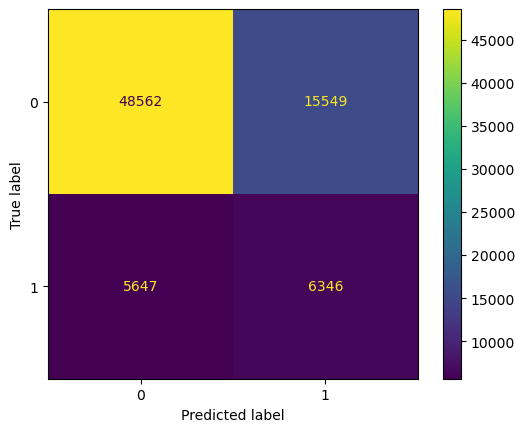

In [14]:
# Create visualisation of confusion matrix
ConfusionMatrixDisplay.from_estimator(grid_search, X_test, y_test);

In [17]:
# Classification Report
report_initial = classification_report(y_test, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.90      0.76      0.82     64111
           1       0.29      0.53      0.37     11993

    accuracy                           0.72     76104
   macro avg       0.59      0.64      0.60     76104
weighted avg       0.80      0.72      0.75     76104



### 4b.4 Observations